# Gini index

By Jaime Lopez  
Mar. 10, 2019 (Updated: Apr. 20, 2019)

## Theory

The Gini index is typically used for categorical attributes to measure their discriminative power.

Let $v_1, v_2, \dots, v_r$ be the $r$ possible values of a particular categorical attribute. Let $p_j$ be the fraction of data points containing attribute of value $v_i$ that belongs to the class $j \in \{1, 2, \dots, k\}$ for the attribute  $v_i$.

The Gini index $G(v_i)$ is defined as follows:

$$G(v_i) = 1 - \sum_{j=1}^k p_j^2$$

When the different classes are distributed evenly for a particular attribute value, the value of Gini index is $1 - 1/k$. If all data points for an attribute value $v_i$ belong to the same class, then the Gini index is 0. Lower values of the Gini index imply greater discrimination. In other words, higher values of the Gini index indicate more disorder, and lower values indicate more order in terms of the class labels.

The value-specific Gini index is converted into an attributewise Gini index. Let $n_i$ be the number of data points that take on the value $v_i$ for an attribute. Then, for a dataset containing $\sum_{i=1}^n n_i = n$ data points, the overall Gini index $G$ for the attribute is defined as the weighted average over the different attribute value as follows:

$$G= \frac{1}{n} \sum_{i=1}^r n_i G(v_i)$$

As an example, the [adult dataset](http://archive.ics.uci.edu/ml/datasets/Adult) from UCI Machine Learning Repository will be used.

## Implementation

First, the environment is configurated loading libraries as `pandas` and `numpy`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Workin with the adult dataset
data = pd.read_csv('datasets/adult/adult.csv')
print(data.shape)

(32561, 15)


In the previous lines, the `adult` dataset was loaded which has 15 features and 32,561 observations. It has been referenced by the `data` variable. 

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In the next cell, a function to calculate the Gini for each value in an feature is implemented. Next it is tested with the `education` attribute.

In [4]:
def gini_per_value(data, attribute):
    """
    This function calculates gini index for each value
    contained in a categorical attribute related with
    the output labels.
    """
    g = {}
    v = data[attribute].unique()
    for v_i in v:
        freq = data[data[attribute] == v_i]['label'].value_counts()
        p = freq / freq.sum()
        g_i = 1 - np.square(p).sum()
        g[v_i] = g_i
    return g

In [5]:
gini_education = gini_per_value(data, 'education')
gini_education

{' Bachelors': 0.48546575057038055,
 ' HS-grad': 0.26813123787640225,
 ' 11th': 0.09691263014938878,
 ' Masters': 0.4935957441720009,
 ' 9th': 0.09953973565080476,
 ' Some-college': 0.3080907142899201,
 ' Assoc-acdm': 0.37335450759735056,
 ' Assoc-voc': 0.38596404883126234,
 ' 7th-8th': 0.11617095917721831,
 ' Doctorate': 0.38391501386535665,
 ' Prof-school': 0.39013671875,
 ' 5th-6th': 0.09147886625364099,
 ' 10th': 0.12407279127019422,
 ' 1st-4th': 0.06887755102040805,
 ' Preschool': 0.0,
 ' 12th': 0.1408082607512975}

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

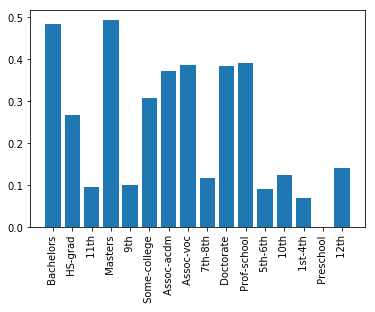

In [6]:
plt.bar(gini_education.keys(), gini_education.values())
plt.xticks(rotation=90)

Using the previous function, next a function to calculate the global Gini Index for a given list of features is implemented.

In [7]:
def gini_index(data, attributes):
    """
    This function finds a aggregate Gini
    index for a categorical attribute
    """
    res = {}
    for attrib in attributes:
        v = data[attrib].unique()
        g = gini_per_value(data, attrib)
        n = data[attrib].value_counts()
        N = n.sum()
        n = dict(n)
        G = np.array([n[v_i] * g[v_i] for v_i in v]).sum() / N
        res[attrib] = G
    return res

The implementation is tested at first with the `education` feature. Next, all categorical features in the `adult` dataset are given for calculation of the global Gini Index.

In [8]:
gini_index(data, ['education'])

{'education': 0.3158982617404577}

In [9]:
categorical_attributes = ['workclass', 'education', 'marital-status',
                'occupation', 'relationship', 'race', 'sex', 'native-country']

In [10]:
ginis = gini_index(data, categorical_attributes)
ginis

{'workclass': 0.3538979444734442,
 'education': 0.3158982617404577,
 'marital-status': 0.2924502737131609,
 'occupation': 0.3203639602064241,
 'relationship': 0.2904139869781749,
 'race': 0.36192458971149577,
 'sex': 0.3485844349969883,
 'native-country': 0.3620783207623509}

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

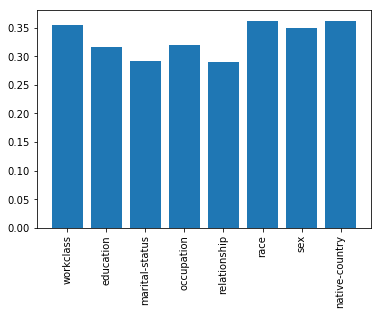

In [11]:
plt.bar(ginis.keys(), ginis.values())
plt.xticks(rotation=90)

In conclusion, for this example 'relationship' has the highest discriminative power while 'native-country' has the lowest.

## References

- Aggarwal, C. C. (Ed.). (2014). An Introduction to Data Classification (pp. 1-36). _Data classification: algorithms and applications_. Boca Raton, Fla.: CRC Press/Chapman & Hall.
- Aggarwal, C. C. (2015). _Data mining: the textbook_. Switzerland: Springer. pp. 289-290
- Bramer, M. (2007). Principles of Data Mining. London: Springer-Verlag London Limited. pp. 68-70
- Webb, A. R., & Copsey, K. D. (2011). _Statistical pattern recognition_ (3rd ed). United Kingdown: Wiley. p. 328
- Zaki, M. J., & Meira, W. (2014). Data mining and analysis: fundamental concepts and algorithms. New York, NY: Cambridge University Press. p. 500